In [1]:
%%time
import h5py
import numpy as np
import math
import matplotlib.pyplot  as pl
with h5py.File('../Input/images_training.h5','r') as H:
    data = np.copy(H['data']) #shape (30000, 28, 28)
with h5py.File('../Input/labels_training.h5','r') as H:
    label = np.copy(H['label']) #shape (30000, )
with h5py.File('../Input/images_testing.h5','r') as H:
    datatest = np.copy(H['data']) #shape (30000, 28, 28)
with h5py.File('../Input/labels_testing_2000.h5','r') as H:
    labeltest = np.copy(H['label']) #shape (30000, )
data = data.reshape(len(data), -1)
datatest = datatest.reshape(len(datatest), -1)
%run preprocessing.py
standard = StandardScaler()
standard.fit(data)
data = standard.transform(data)
datatest = standard.transform(datatest)
%run PCA.py
pca = PCA(n_components = 185) #80:40%, 60:38%, 40:37.65%, 100:43.85%, 110:44.05%, 112:44.25%, 113:44.3%, 114:44.25%, 115:44.55%,116:44.05%, 117:44.4%,118:44.05%, 120: 29.8%
pca.fit(data)
data_PCA = pca.transform(data)
datatest_PCA = pca.transform(datatest)

Wall time: 1min 2s


In [2]:
with h5py.File("../Input/data_PCA.h5", "w") as f:
     f.create_dataset("data_PCA", data=data_PCA)
with h5py.File("../Input/datatest_PCA.h5", "w") as f:
     f.create_dataset("datatest_PCA", data=datatest_PCA)   

In [3]:
import h5py
import numpy as np
import math
import matplotlib.pyplot  as pl
with h5py.File('../Input/data_PCA.h5','r') as H:
    data_PCA = np.copy(H['data_PCA']) #shape (30000, n)
with h5py.File('../Input/labels_training.h5','r') as H:
    label = np.copy(H['label']) #shape (30000, )
with h5py.File('../Input/datatest_PCA.h5','r') as H:
    datatest_PCA = np.copy(H['datatest_PCA']) #shape (30000, n)
with h5py.File('../Input/labels_testing_2000.h5','r') as H:
    labeltest = np.copy(H['label']) #shape (30000, )

In [4]:
%%time
%run LR.py
# PCA=115

# lr = LR(10,1,0.000005,400) 82
# lr = LR(10,1,0.000005,100) 78.95
# lr = LR(10,1,0.000005,200) 78.95
# lr = LR(10,1,0.000005,300) 81.4
# lr = LR(10,1,0.000005,400) 81.4 1m4
# lr = LR(10,1,0.000005,500) 81.6 1m48
# lr = LR(10,1,0.000005,600) 81.6 1m48
# lr = LR(10,1,0.000005,700) 81.95 2m32
# lr = LR(10,1,0.000005,800) 82.05 2m49
# lr = LR(10,1,0.000005,900) 82.05 3m5
# lr = LR(10,1,0.000005,1000) 82 3m40

# PCA=60
# lr = LR(10,1,0.000005,400) 79.75 49.4s

# PCA=160
# lr = LR(10,1,0.000005,400) 82.25 1m57

# PCA=170
# lr = LR(10,1,0.000005,400) 82.3 2m10

# PCA=185
# lr = LR(10,1,0.000005,400)82.55 2m21
# lr = LR(10,1,0.000005,800) 83 4m39

# PCA=190
lr = LR(10,1,0.000005,400) #82.75%
# lr = LR(10,1,0.000005,800) 83.25% 4m49

# PCA=200
# lr = LR(10,1,0.000005,400) 82.50 2m30

# PCA=220
# lr = LR(10,1,0.000005,400) 82.35 2m47

Wall time: 3.99 ms


In [5]:
%%time
lr.fit(data_PCA,label)

Wall time: 2min 8s


In [6]:
%%time
class_out = lr.predict(datatest_PCA[0:2000])
correct=np.sum(class_out==labeltest)
print("Accuracy:  %8.5f%%" %(100*correct/2000))

Accuracy:  82.55000%
Wall time: 42.9 ms


## Confusion Matrix

In [7]:
cm = np.zeros((10, 10), dtype='int')
for i in range(10): #prediction of each class，rows in the matrix
    for j in range(10): #real label of each class, columns in the matrix
        cm[j][i] = np.sum((class_out == i) & (labeltest == j))

In [8]:
cm # show Confusion Matrix

array([[145,   1,   2,  12,   0,   1,  14,   0,   3,   0],
       [  0, 185,   1,   5,   0,   0,   0,   0,   0,   0],
       [  5,   0, 153,   1,  32,   3,  13,   0,   3,   0],
       [  5,   2,   3, 167,   7,   4,   2,   0,   1,   0],
       [  0,   2,  22,   9, 160,   1,  16,   0,   2,   0],
       [  1,   0,   0,   1,   0, 184,   0,  12,   2,  14],
       [ 27,   0,  29,  13,  31,   2,  95,   0,   3,   0],
       [  0,   0,   0,   0,   0,   9,   0, 181,   0,   8],
       [  1,   2,   1,   3,   1,   2,   2,   2, 204,   1],
       [  0,   0,   0,   0,   0,   4,   1,   5,   0, 177]])

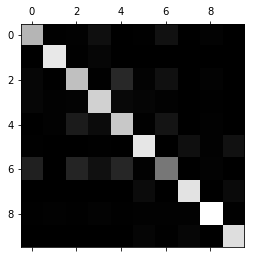

In [9]:
# visualization
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter

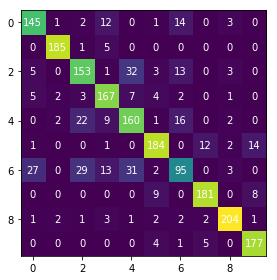

In [10]:
#another way to visulize
fig, ax = plt.subplots()
im = ax.imshow(cm)
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, cm[i][j], ha='center', va='center', color='w')
fig.tight_layout()
plt.show()

## Error rate Matrix

In [11]:
error_matrix = cm / np.sum(cm, axis=1)
np.fill_diagonal(error_matrix, 0)
#error_matrix: the bigger value means more wrong predictions

In [12]:
error_matrix

array([[0.        , 0.0052356 , 0.00952381, 0.06282723, 0.        ,
        0.0046729 , 0.07      , 0.        , 0.01369863, 0.        ],
       [0.        , 0.        , 0.0047619 , 0.02617801, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.02808989, 0.        , 0.        , 0.0052356 , 0.1509434 ,
        0.01401869, 0.065     , 0.        , 0.01369863, 0.        ],
       [0.02808989, 0.0104712 , 0.01428571, 0.        , 0.03301887,
        0.01869159, 0.01      , 0.        , 0.00456621, 0.        ],
       [0.        , 0.0104712 , 0.1047619 , 0.04712042, 0.        ,
        0.0046729 , 0.08      , 0.        , 0.00913242, 0.        ],
       [0.00561798, 0.        , 0.        , 0.0052356 , 0.        ,
        0.        , 0.        , 0.06060606, 0.00913242, 0.07486631],
       [0.15168539, 0.        , 0.13809524, 0.06806283, 0.14622642,
        0.00934579, 0.        , 0.        , 0.01369863, 0.        ],
       [0.        , 0.        , 0.       

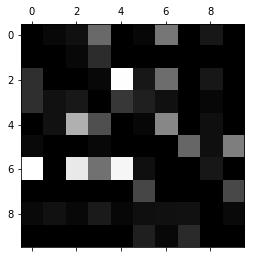

In [13]:
# visualization
import matplotlib.pyplot as plt
plt.matshow(error_matrix, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter

#### So we can see that the 0th: 'T-shirt/top' were oftern wrongly predicted as the 6th: 'Shirt', while actually  they are similar   
#### and the 4th class 'Coat' were oftern wrongly predicted as the 2th:'Pullover' and the 6th :Shirt